## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from scipy.stats import norm, lognorm

In [2]:
print("Yfinance version: " , yf.__version__)

Yfinance version:  0.2.37


In [3]:
# Set default parameters for plt.title()
plt.rcParams['axes.titlepad'] = 12  # Set padding around the title
plt.rcParams['axes.titleweight'] = 'normal'  # Set title font size
plt.rcParams['axes.titlesize'] = 9  # Set title font size

## Fetch data

In [4]:
def fetch_stock_data(tickers, start_date, end_date, interval):
    data = yf.download(tickers, start=start_date, end=end_date, interval=interval)
    return data

In [5]:
# select tickers
tickers = ["BRK-B", "IAU"]   #BRK-B, MSFT, META, GOOG, AMZN, AAPL, TSM, BAC, WFC, VALE, KO, JNJ, DG, DIS, SPY 

# date format YYYY-MM-DD
start_date = "2010-01-01"
end_date = "2024-02-01"

# time interval to take the cotations, in this case monthly
interval= "1d"

stock_data = fetch_stock_data(tickers, start_date, end_date, interval)

display(stock_data)

[*********************100%%**********************]  2 of 2 completed


Price        Adj Close                  Close                   High  \
Ticker           BRK-B        IAU       BRK-B        IAU       BRK-B   
Date                                                                   
2010-01-04   66.220001  21.978001   66.220001  21.978001   66.500000   
2010-01-05   66.540001  21.954000   66.540001  21.954000   66.589996   
2010-01-06   66.199997  22.326000   66.199997  22.326000   66.500000   
2010-01-07   66.459999  22.181999   66.459999  22.181999   66.510002   
2010-01-08   66.440002  22.290001   66.440002  22.290001   66.480003   
...                ...        ...         ...        ...         ...   
2024-01-25  380.850006  38.230000  380.850006  38.230000  380.989990   
2024-01-26  385.399994  38.180000  385.399994  38.180000  385.730011   
2024-01-29  383.179993  38.459999  383.179993  38.459999  385.700012   
2024-01-30  387.149994  38.509998  387.149994  38.509998  387.640015   
2024-01-31  383.739990  38.490002  383.739990  38.490002  387.920013   

Price                         Low                   Open              Volume  \
Ticker            IAU       BRK-B        IAU       BRK-B        IAU    BRK-B   
Date                                                                           
2010-01-04  22.038000   65.919998  21.882000   66.000000  21.978001  1575000   
2010-01-05  22.084000   66.150002  21.870001   66.389999  21.988001  1310000   
2010-01-06  22.368000   66.199997  22.110001   66.500000  22.156000  1760000   
2010-01-07  22.264000   66.139999  22.152000   66.199997  22.230000  1505000   
2010-01-08  22.326000   66.300003  22.077999   66.480003  22.306000  1500000   
...               ...         ...        ...         ...        ...      ...   
2024-01-25  38.320000  377.890015  38.080002  379.239990  38.270000  4055800   
2024-01-26  38.270000  380.000000  38.139999  381.049988  38.250000  3621400   
2024-01-29  38.509998  379.170013  38.240002  385.489990  38.459999  3797400   
2024-01-30  38.770000  380.079987  38.389999  383.239990  38.740002  3090900   
2024-01-31  38.900002  383.549988  38.419998  386.529999  38.669998  3856400   

Price                
Ticker          IAU  
Date                 
2010-01-04  1185000  
2010-01-05   936000  
2010-01-06  1091000  
2010-01-07   811500  
2010-01-08   737000  
...             ...  
2024-01-25  4637800  
2024-01-26  3288100  
2024-01-29  3503900  
2024-01-30  4125600  
2024-01-31  9428800  

[3543 rows x 12 columns]

In [6]:
# select only the closing price
df_close = stock_data.Close.copy()
# df_close.info()
df_close.head(3)

Ticker,BRK-B,IAU
Date,,
2010-01-04,66.220001,21.978001
2010-01-05,66.540001,21.954000
2010-01-06,66.199997,22.326000


In [7]:
# find the 
df_daily_return = (df_close
                   .copy()
                   .pct_change(periods=1)
                   .dropna()
)

# display(cov_yoy.describe())
df_daily_return.head(3)

Ticker,BRK-B,IAU
Date,,
2010-01-05,0.004832,-0.001092
2010-01-06,-0.005110,0.016945
2010-01-07,0.003928,-0.006450


## Covariance

### Calculation (YoY)

In [8]:
# find the 
cov_yoy = (df_close
             .copy()
             .pct_change(periods=1)
             .dropna()
             .rolling(window=252)
             .cov()
             .dropna()
             .apply(lambda x: 252 * x)
)

# display(cov_yoy.describe())
cov_yoy

Ticker                BRK-B       IAU
Date       Ticker                    
2011-01-03 BRK-B   0.053128  0.001466
           IAU     0.001466  0.027043
2011-01-04 BRK-B   0.053127  0.001567
           IAU     0.001567  0.027621
2011-01-05 BRK-B   0.053161  0.001632
...                     ...       ...
2024-01-29 IAU    -0.001989  0.017222
2024-01-30 BRK-B   0.018256 -0.001988
           IAU    -0.001988  0.017222
2024-01-31 BRK-B   0.018303 -0.002003
           IAU    -0.002003  0.017211

[6582 rows x 2 columns]

In [9]:
cov_yoy[(cov_yoy.index.get_level_values('Ticker') == tickers[0])].head(3)

,Ticker,BRK-B,IAU
Date,Ticker,,
2011-01-03,BRK-B,0.053128,0.001466
2011-01-04,BRK-B,0.053127,0.001567
2011-01-05,BRK-B,0.053161,0.001632


In [10]:
cov11 = cov_yoy[(cov_yoy.index.get_level_values('Ticker') == tickers[0])][tickers[0]].values
cov12 = cov_yoy[(cov_yoy.index.get_level_values('Ticker') == tickers[0])][tickers[1]].values
# cov21 = cov12
cov22 = cov_yoy[(cov_yoy.index.get_level_values('Ticker') == tickers[1])][tickers[1]].values

### Plots

#### Normal:

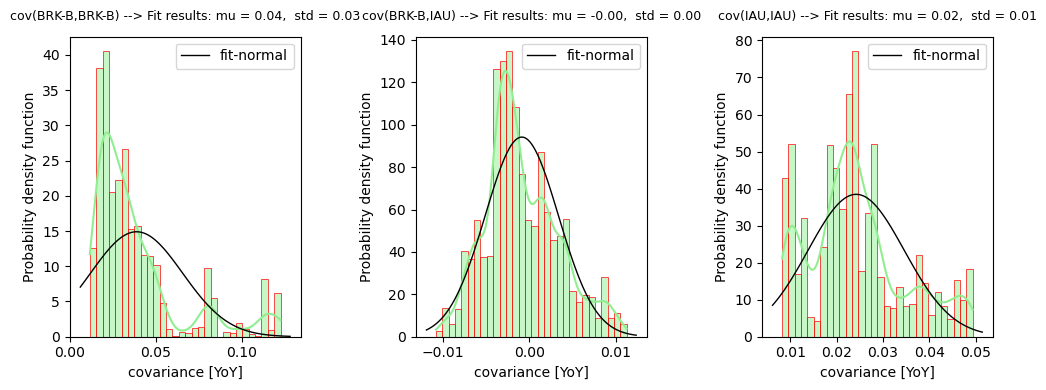

In [11]:
# Plot the histogram of the returns_daily along with the fitted Gaussian distribution
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))

# Fit a Gaussian distribution to the YoY covariance
plt.subplot(1, 3, 1)
mu, std = norm.fit(cov11)
sns.histplot(data= cov11, bins=30, stat="density", kde=True, color='lightgreen', edgecolor='red')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', label="fit-normal", linewidth=1)
plt.title(f"cov({tickers[0]},{tickers[0]}) --> Fit results: mu = %.2f,  std = %.2f" % (mu, std))
plt.ylabel("Probability density function")
plt.xlabel("covariance [YoY]")
plt.legend()

# Fit a Gaussian distribution to the YoY covariance
plt.subplot(1, 3, 2)
mu, std = norm.fit(cov12)
sns.histplot(data= cov12, bins=30, stat="density", kde=True, color='lightgreen', edgecolor='red')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', label="fit-normal", linewidth=1)
plt.title(f"cov({tickers[0]},{tickers[1]}) --> Fit results: mu = %.2f,  std = %.2f" % (mu, std))
plt.ylabel("Probability density function")
plt.xlabel("covariance [YoY]")
plt.legend()

# Fit a Gaussian distribution to the YoY covariance
plt.subplot(1, 3, 3)
mu, std = norm.fit(cov22)
sns.histplot(data= cov22, bins=30, stat="density", kde=True, color='lightgreen', edgecolor='red')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', label="fit-normal", linewidth=1)
plt.title(f"cov({tickers[1]},{tickers[1]}) --> Fit results: mu = %.2f,  std = %.2f" % (mu, std))
plt.ylabel("Probability density function")
plt.xlabel("covariance [YoY]")
plt.legend()

fig.tight_layout()
fig.subplots_adjust(wspace=0.5)
plt.show()

#### Lognormal:

C:\Users\DELL\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:6111: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)


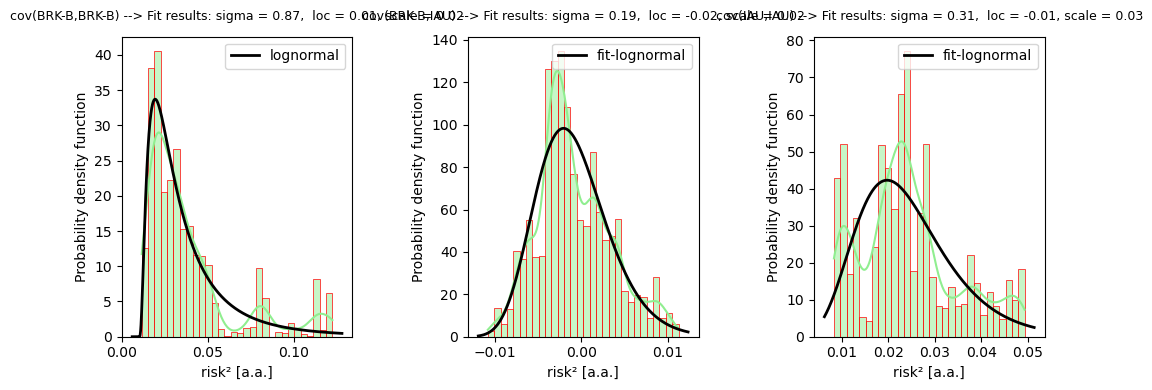

In [12]:
# Plot the histogram of the returns_daily along with the fitted Gaussian distribution
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))

# Fit a Lognormal distribution to theYoY covariance
plt.subplot(1, 3, 1)
sigma, loc, scale = lognorm.fit(cov11)

sns.histplot(data= cov11, bins=30, stat="density", kde=True, color='lightgreen', edgecolor='red')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
pdf = lognorm.pdf(x, sigma, loc= loc, scale= scale)

plt.plot(x, pdf, 'k', label="lognormal", linewidth=2)
plt.title(f"cov({tickers[0]},{tickers[0]}) --> Fit results: sigma = %.2f,  loc = %.2f, scale = %.2f" % (sigma, loc, scale))
plt.ylabel("Probability density function")
plt.xlabel("risk² [a.a.]")
plt.legend()


# Fit a Lognormal distribution to theYoY covariance
plt.subplot(1, 3, 2)
sigma, loc, scale = lognorm.fit(cov12)

sns.histplot(data= cov12, bins=30, stat="density", kde=True, color='lightgreen', edgecolor='red')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
pdf = lognorm.pdf(x, sigma, loc= loc, scale= scale)

plt.plot(x, pdf, 'k', label="fit-lognormal", linewidth=2)
plt.title(f"cov({tickers[0]},{tickers[1]}) --> Fit results: sigma = %.2f,  loc = %.2f, scale = %.2f" % (sigma, loc, scale))
plt.ylabel("Probability density function")
plt.xlabel("risk² [a.a.]")
plt.legend()

# Fit a Lognormal distribution to theYoY covariance
plt.subplot(1, 3, 3)
sigma, loc, scale = lognorm.fit(cov22)

sns.histplot(data= cov22, bins=30, stat="density", kde=True, color='lightgreen', edgecolor='red')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
pdf = lognorm.pdf(x, sigma, loc= loc, scale= scale)

plt.plot(x, pdf, 'k', label="fit-lognormal", linewidth=2)
plt.title(f"cov({tickers[1]},{tickers[1]}) --> Fit results: sigma = %.2f,  loc = %.2f, scale = %.2f" % (sigma, loc, scale))
plt.ylabel("Probability density function")
plt.xlabel("risk² [a.a.]")
plt.legend()

fig.tight_layout()
fig.subplots_adjust(wspace=0.5)
plt.show()

## Correlation

### Calculation (YoY)

In [13]:
# find the covelation yoy
corr_yoy = (df_close
            .copy()
            .pct_change(periods=1)
            .dropna()
            .rolling(window=252)
            .corr()
            .dropna()
            # .apply(lambda x: x + 1.0)
)

# display(cov_yoy.describe())
corr_yoy

Ticker                BRK-B       IAU
Date       Ticker                    
2011-01-03 BRK-B   1.000000  0.038690
           IAU     0.038690  1.000000
2011-01-04 BRK-B   1.000000  0.040918
           IAU     0.040918  1.000000
2011-01-05 BRK-B   1.000000  0.042789
...                     ...       ...
2024-01-29 IAU    -0.112311  1.000000
2024-01-30 BRK-B   1.000000 -0.112101
           IAU    -0.112101  1.000000
2024-01-31 BRK-B   1.000000 -0.112832
           IAU    -0.112832  1.000000

[6582 rows x 2 columns]

In [14]:
corr_yoy[(corr_yoy.index.get_level_values('Ticker') == tickers[0])].head(3)

,Ticker,BRK-B,IAU
Date,Ticker,,
2011-01-03,BRK-B,1.0,0.038690
2011-01-04,BRK-B,1.0,0.040918
2011-01-05,BRK-B,1.0,0.042789


In [15]:
corr11 = corr_yoy[(corr_yoy.index.get_level_values('Ticker') == tickers[0])][tickers[0]].values
corr12 = corr_yoy[(corr_yoy.index.get_level_values('Ticker') == tickers[0])][tickers[1]].values
# corr21 = corr12
corr22 = corr_yoy[(corr_yoy.index.get_level_values('Ticker') == tickers[1])][tickers[1]].values

### Plots

#### Normal:

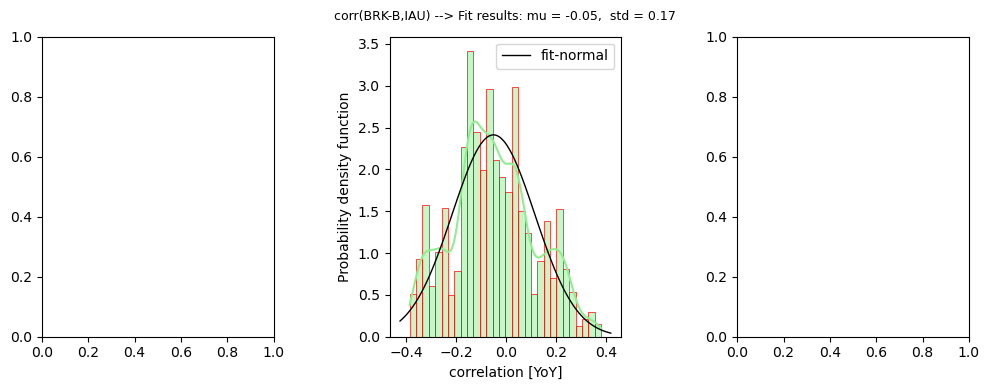

In [16]:
# Plot the histogram of the returns_daily along with the fitted Gaussian distribution
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))

# Fit a Gaussian distribution to the YoY corrariance
plt.subplot(1, 3, 1)
# mu, std = norm.fit(corr11)
# sns.histplot(data= corr11, bins=30, stat="density", kde=True, color='lightgreen', edgecolor='red')

# xmin, xmax = plt.xlim()
# x = np.linspace(xmin, xmax, 100)
# p = norm.pdf(x, mu, std)

# plt.plot(x, p, 'k', label="fit-normal", linewidth=1)
# plt.title(f"corr({tickers[0]},{tickers[0]}) --> Fit results: mu = %.2f,  std = %.2f" % (mu, std))
# plt.ylabel("Probability density function")
# plt.xlabel("correlation [YoY]")
# plt.legend()

# Fit a Gaussian distribution to the YoY corrariance
plt.subplot(1, 3, 2)
mu, std = norm.fit(corr12)
sns.histplot(data= corr12, bins=30, stat="density", kde=True, color='lightgreen', edgecolor='red')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', label="fit-normal", linewidth=1)
plt.title(f"corr({tickers[0]},{tickers[1]}) --> Fit results: mu = %.2f,  std = %.2f" % (mu, std))
plt.ylabel("Probability density function")
plt.xlabel("correlation [YoY]")
plt.legend()

# Fit a Gaussian distribution to the YoY corrariance
plt.subplot(1, 3, 3)
# mu, std = norm.fit(corr22)
# sns.histplot(data= corr22, bins=30, stat="density", kde=True, color='lightgreen', edgecolor='red')

# xmin, xmax = plt.xlim()
# x = np.linspace(xmin, xmax, 100)
# p = norm.pdf(x, mu, std)

# plt.plot(x, p, 'k', label="fit-normal", linewidth=1)
# plt.title(f"corr({tickers[1]},{tickers[1]}) --> Fit results: mu = %.2f,  std = %.2f" % (mu, std))
# plt.ylabel("Probability density function")
# plt.xlabel("correlation [YoY]")
# plt.legend()

fig.tight_layout()
fig.subplots_adjust(wspace=0.5)
plt.show()

#### Lognormal:

C:\Users\DELL\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:6111: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)


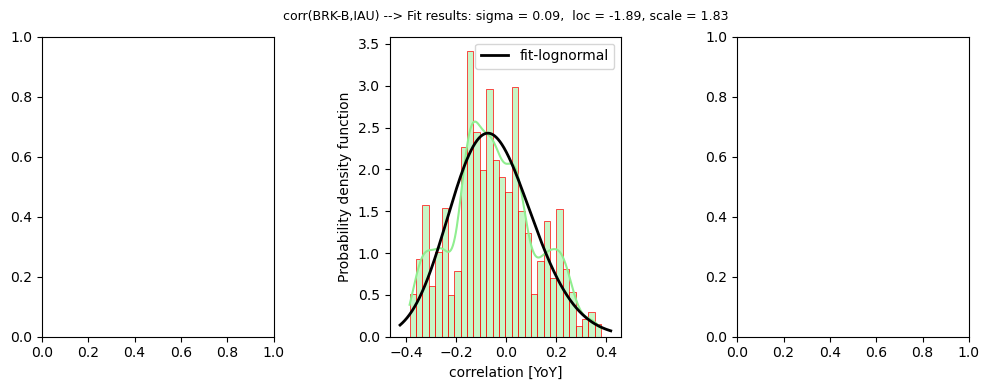

In [17]:
# Plot the histogram of the returns_daily along with the fitted Gaussian distribution
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))

# Fit a Lognormal distribution to theYoY corrariance
plt.subplot(1, 3, 1)
# sigma, loc, scale = lognorm.fit(corr11)

# sns.histplot(data= corr11, bins=30, stat="density", kde=True, color='lightgreen', edgecolor='red')
# xmin, xmax = plt.xlim()
# x = np.linspace(xmin, xmax, 1000)
# pdf = lognorm.pdf(x, sigma, loc= loc, scale= scale)

# plt.plot(x, pdf, 'k', label="lognormal", linewidth=2)
# plt.title(f"corr({tickers[0]},{tickers[0]}) --> Fit results: sigma = %.2f,  loc = %.2f, scale = %.2f" % (sigma, loc, scale))
# plt.ylabel("Probability density function")
# plt.xlabel("correlation [YoY]")
# plt.legend()


# Fit a Lognormal distribution to theYoY corrariance
plt.subplot(1, 3, 2)
sigma, loc, scale = lognorm.fit(corr12)

sns.histplot(data= corr12, bins=30, stat="density", kde=True, color='lightgreen', edgecolor='red')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
pdf = lognorm.pdf(x, sigma, loc= loc, scale= scale)

plt.plot(x, pdf, 'k', label="fit-lognormal", linewidth=2)
plt.title(f"corr({tickers[0]},{tickers[1]}) --> Fit results: sigma = %.2f,  loc = %.2f, scale = %.2f" % (sigma, loc, scale))
plt.ylabel("Probability density function")
plt.xlabel("correlation [YoY]")
plt.legend()

# Fit a Lognormal distribution to theYoY corrariance
plt.subplot(1, 3, 3)
# sigma, loc, scale = lognorm.fit(corr22)

# sns.histplot(data= corr22, bins=30, stat="density", kde=True, color='lightgreen', edgecolor='red')
# xmin, xmax = plt.xlim()
# x = np.linspace(xmin, xmax, 1000)
# pdf = lognorm.pdf(x, sigma, loc= loc, scale= scale)

# plt.plot(x, pdf, 'k', label="fit-lognormal", linewidth=2)
# plt.title(f"corr({tickers[1]},{tickers[1]}) --> Fit results: sigma = %.2f,  loc = %.2f, scale = %.2f" % (sigma, loc, scale))
# plt.ylabel("Probability density function")
# plt.xlabel("correlation [YoY]")
# plt.legend()

fig.tight_layout()
fig.subplots_adjust(wspace=0.5)
plt.show()

## Monte carlo simulation

### Equations:
<br>

- **Portfolio Return**:
<br>
$$ R_P = {\omega}^T \cdot R $$
<br>
with $R_P$ being the return of the portfolio, $\omega$ the weights and $R$ the returns of the assets. Each one are given by:
<br><br>

<table>
  <tr>
    <td>
      $$
        \omega = \begin{bmatrix}
                {\omega}_A \\
                {\omega}_B \\
                {\omega}_C \\
        \end{bmatrix},
      $$
    </td>
    <td>
      and
    </td>
    <td>
    $$
        R = \begin{bmatrix}
                R_A \\
                R_B \\
                R_C \\
        \end{bmatrix}.
    $$
    </td>
  </tr>
</table>

<br>

- **Portfolio Risk**: 
<br>
$$ {{\sigma}^2_P} = {\omega}^T \cdot \Sigma \cdot \omega $$
<br>
in wich ${{\sigma}^2_P}$ is the variance of the portfolio and $\Sigma$ is the covariance matrix of the assets. The covariance matrix is given by:
<br>
<br>
$$ \Sigma = \begin{bmatrix}
                {{\sigma}^2_A} & cov(A,B) & cov(A,C) \\
                cov(A,B) & {{\sigma}^2_B} & cov(B,C) \\
                cov(A,C) & cov(B,C) & {{\sigma}^2_C} \\
            \end{bmatrix}.
$$
<br>




## Generate samples from distributions models - Covariance

#### Cov pairs

In [18]:
# Number of samples
num_samples = 1_000

In [19]:
# Generate all pairs of assets for covariance matrix
def generate_cov_pairs():    
    ticker_pairs1 = [(tickers[i], tickers[j]) for i in range(len(tickers)) for j in range(i, len(tickers))]
    ticker_pairs2 = [(j,i) for i,j in ticker_pairs1]
    return set(ticker_pairs1).union(set(ticker_pairs2))

cov_pairs = generate_cov_pairs()

#### Covariance fitting params

In [50]:
# Empty dict to receive the parameters
cov_fitting_params = {}

for i, j in cov_pairs:
    
    if i == j:
        
        df = (df_daily_return[[i]]
              .copy()
              .rolling(window=252)
              .var()
              .dropna()
              .apply(lambda x: 252 * x)
            )
        
        sigma, loc, scale = lognorm.fit(df)
        cov_fitting_params[(i,j)] = {"sigma": sigma, "loc": loc, "scale": scale}

    else:
        
        df = (df_daily_return[[i,j]]
              .copy()
              .rolling(window=252)
              .cov()
              .dropna()
              .apply(lambda x: 252 * x)
            )
    
        cov_ij = df[(df.index.get_level_values('Ticker') == i)][j]
    
        sigma, loc, scale = lognorm.fit(cov_ij)    
        cov_fitting_params[(i,j)] = {"sigma": sigma, "loc": loc, "scale": scale}
    
# cov_fitting_params


C:\Users\DELL\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:6111: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)
C:\Users\DELL\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:6111: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)


In [ ]:
set(ticker_pairs)

In [ ]:
def calculate_return_samples(ticker, num_samples=1_000):
    sigma   = return_fitting_params_lognormal[ticker]["sigma"]
    loc     = return_fitting_params_lognormal[ticker]["loc"]
    scale   = return_fitting_params_lognormal[ticker]["scale"]
    samples = lognorm.rvs(sigma, loc=loc, scale=scale, size=num_samples)  
    return samples

def calculate_risk_samples(ticker, num_samples=1_000):
    sigma   = risk_fitting_params_lognormal[ticker]["sigma"]
    loc     = risk_fitting_params_lognormal[ticker]["loc"]
    scale   = risk_fitting_params_lognormal[ticker]["scale"]
    samples = lognorm.rvs(sigma, loc=loc, scale=scale, size=num_samples)  
    return samples

In [ ]:
# Defining return dict to receive the samples from distributions models builted with their respective parameters
return_samples_lognormal = { ticker: calculate_return_samples(ticker, num_samples) for ticker in tickers }
risk_samples_lognormal   = { ticker:  calculate_risk_samples(ticker, num_samples)  for ticker in tickers }

In [ ]:
ticker = tickers[0]
sns.histplot(returns_daily[ticker] + 1.0, bins=30, stat="density", kde=True, color='blue', edgecolor=None, label="data samples")
sns.histplot(return_samples_lognormal[ticker], bins=30, stat="density", kde=True, color='green', edgecolor='green', alpha=0.3, label="lognormal samples")
plt.xlabel(f"{ticker}  ->  1.0 + return[a.a.]")
plt.legend()
plt.show()